# Emergent Topology of Ideas in Vision Transformers

First, we would like to note that this same analysis appo language models as well. As a first step in this process, let's plot the attention graph for a single input image. 

Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


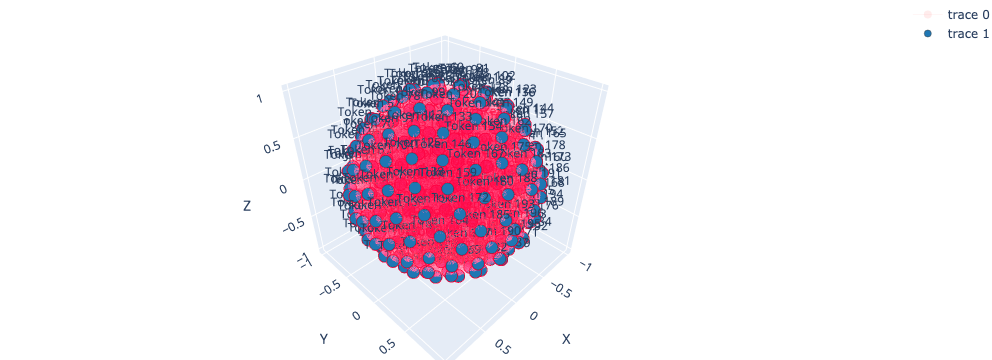

In [1]:
import torch
import torchvision.transforms as T
from PIL import Image
from transformers import ViTImageProcessor, ViTModel
import networkx as nx
import plotly.graph_objects as go
import numpy as np

# Load and preprocess the input image
image_path = "heart.jpg"
image = Image.open(image_path)
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
image_tensor = transform(image)  # Do not add batch dimension

# Load the pre-trained ViT model and image processor
model_name = "google/vit-base-patch16-224"
image_processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)

# Tokenize the image using the image processor
inputs = image_processor(images=[image_tensor], return_tensors="pt")

# Obtain the embeddings and attention weights for specific `layer` and `head` using the pre-trained ViT model
layer = 2
head = 3
outputs = model(**inputs, output_attentions=True)
attention_scores = outputs.attentions[layer][0][head].detach().cpu().numpy()

# Function to generate Fibonacci sphere points
def fibonacci_sphere_points(samples):
    points = []
    offset = 2 / samples
    increment = np.pi * (3 - np.sqrt(5))

    for i in range(samples):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - pow(y, 2))
        phi = ((i + 1) % samples) * increment

        x = np.cos(phi) * r
        z = np.sin(phi) * r
        points.append((x, y, z))

    return points

# Function to plot the attention graph
def plot_attention_graph(attention_scores, tokens):
    # Create graph object
    G = nx.from_numpy_array(attention_scores)

    # Set node positions
    pos = {i: coord for i, coord in enumerate(fibonacci_sphere_points(len(G.nodes())))}

    # Set edge trace
    edge_x = []
    edge_y = []
    edge_z = []
    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

    edge_trace = go.Scatter3d(x=edge_x, y=edge_y, z=edge_z,
                          line=dict(width=0.5, color='rgba(255, 0, 5, 0.075)'))

    # Set node trace
    node_x = []
    node_y = []
    node_z = []
    node_text = []
    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(tokens[node])

    node_trace = go.Scatter3d(x=node_x, y=node_y, z=node_z,
                              mode='markers+text',
                              marker=dict(symbol='circle',
                                          size=7,
                                          color='#1f77b4',
                                          line=dict(width=0.5)),
                              text=node_text,
                              textposition='top center')

    # Set layout
    layout = go.Layout(scene=dict(xaxis=dict(title='X'),
                                   yaxis=dict(title='Y'),
                                   zaxis=dict(title='Z')), margin=dict(l=0, r=0, b=0, t=0))
    # Create figure and plot
    fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
    fig.show()

# Generate a list of tokens for demonstration purposes
tokens = [f'Token {i}' for i in range(attention_scores.shape[0])]

# Plot the attention graph with token labels
plot_attention_graph(attention_scores, tokens)


Some weights of the model checkpoint at google/vit-base-patch16-224 were not used when initializing ViTModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
usetex mode requires TeX.


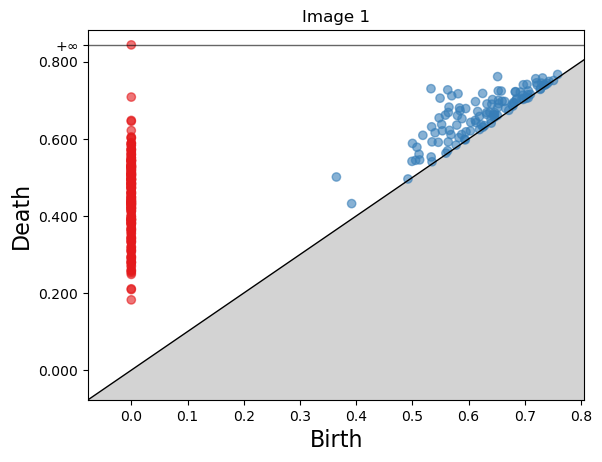

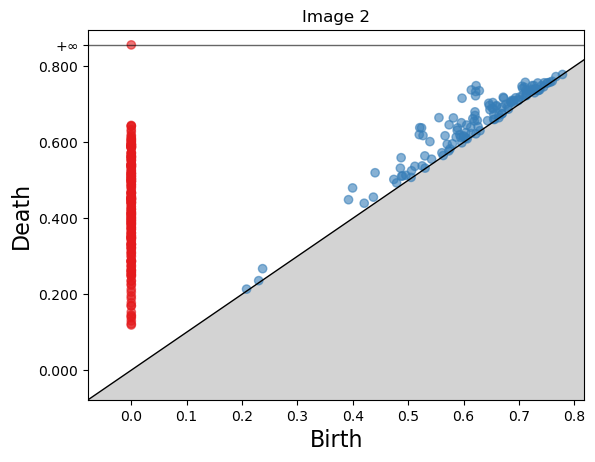

In [6]:
import torch
import torchvision.transforms as T
from PIL import Image
from transformers import ViTImageProcessor, ViTModel
from scipy.spatial.distance import jensenshannon
from sklearn.metrics import pairwise_distances
import numpy as np
import gudhi as gd
import gudhi
import matplotlib.pyplot as plt

# Load and preprocess the input images
image_path1 = "platonic_metatron.jpg"
image_path2 = "heart.jpg"
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
image_tensor1 = transform(image1)  # Do not add batch dimension
image_tensor2 = transform(image2)  # Do not add batch dimension

# Load the pre-trained ViT model and image processor
model_name = "google/vit-base-patch16-224"
image_processor = ViTImageProcessor.from_pretrained(model_name)
model = ViTModel.from_pretrained(model_name)

# Tokenize the images using the image processor
inputs1 = image_processor(images=[image_tensor1], return_tensors="pt")
inputs2 = image_processor(images=[image_tensor2], return_tensors="pt")

# Obtain the embeddings and attention weights for specific `layer` and `head` using the pre-trained ViT model
layer = 2
head = 3
outputs1 = model(**inputs1, output_attentions=True)
outputs2 = model(**inputs2, output_attentions=True)
attention_scores1 = outputs1.attentions[layer][0][head].detach().cpu().numpy()
attention_scores2 = outputs2.attentions[layer][0][head].detach().cpu().numpy()

# Compute the pairwise Jensen-Shannon distance matrix for each image
js_distance_matrix1 = pairwise_distances(attention_scores1, metric=lambda u, v: jensenshannon(u, v))
js_distance_matrix2 = pairwise_distances(attention_scores2, metric=lambda u, v: jensenshannon(u, v))

# Perform the persistent homology analysis using Gudhi
def compute_persistence(distance_matrix):
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    persistence = simplex_tree.persistence()
    return persistence

persistence1 = compute_persistence(js_distance_matrix1)
persistence2 = compute_persistence(js_distance_matrix2)

# Plot persistence diagrams
def plot_persistence_diagram(persistence, title):
    gudhi.plot_persistence_diagram(persistence)
    plt.title(title)
    plt.xlabel("Birth")
    plt.ylabel("Death")
    plt.show()

plot_persistence_diagram(persistence1, "Image 1")
plot_persistence_diagram(persistence2, "Image 2")

#print("Persistence of image 1:")
#print(persistence1)
#print("\nPersistence of image 2:")
#print(persistence2)
